<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/SalaryData_Train(1).csv")

#**EDA**

In [ ]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
     print(df[i].value_counts())
     print(" ")

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584


In [ ]:
df['workclass'] = df['workclass'].str.strip()
df['workclass'] = df['workclass'].replace({'Without-pay': 'Self-emp-not-inc'})
df['education'] = df['education'].str.strip()
df['education'] = df['education'].replace({'1st-4th': 'Elementary school',
                                           '5th-6th' : 'Elementary school',
                                           '7th-8th' : 'Elementary school',
                                           '9th' : 'HS-grad',
                                           '12th' : 'HS-grad',
                                           '10th' : 'HS-grad',
                                           '11th' : 'HS-grad',
                                           'Some-college' : 'Bachelors',
                                           'Bachelors' : 'Higher Education',
                                           'Masters' : 'Higher Education',
                                           'Assoc-acdm' : 'Higher Education',
                                           'Doctorate' : 'Higher Education',
                                           'Prof-school' : 'Higher Education',
                                           'HS-grad' : 'Secondary Education',
                                           'Assoc-voc' : 'Secondary Education',
                                           'Elementary school' : 'Primary Education',
                                           'Preschool' : 'Primary Education'
                                           })
df['maritalstatus'] = df['maritalstatus'].str.strip()
df['maritalstatus'] = df['maritalstatus'].replace({'Married-civ-spouse': 'Married',
                                                   'Married-spouse-absent': 'Married',
                                                   'Married-AF-spouse' : 'Married',
                                                   'Divorced' : 'Seperated/Divorced',
                                                   'Separated' : 'Seperated/Divorced'
                                                   })
df['occupation'] = df['occupation'].str.strip()
df['occupation'] = df['occupation'].replace({'Prof-specialty': 'White-collar jobs',
                                             'Exec-managerial' : 'White-collar jobs',
                                             'Adm-clerical' : 'White-collar jobs',
                                             'Tech-support' : 'White-collar jobs',
                                             'Craft-repair' : 'Blue-Collar jobs',
                                             'Machine-op-inspct' : 'Blue-Collar jobs',
                                             'Transport-moving' : 'Blue-Collar jobs',
                                             'Handlers-cleaner' : 'Blue-Collar jobs',
                                             'Sales' : 'Sales/Services',
                                             'Other-service' : 'Sales/Services',
                                             'Protective-serv' : 'Sales/Services',
                                             'Priv-house-serv' : 'Sales/Services',
                                             'Farming-fishing' : 'Specialized Roles',
                                             'Armed-Forces' : 'Specialized Roles'
                                             })
df['relationship'] = df['relationship'].str.strip()
df['relationship'] = df['relationship'].replace({'Husband': 'Spouse',
                                                 'Wife' : 'Spouse'})
df['native'] = df['native'].str.strip()
df['native'] = df['native'].replace({'United-States': 'North-America',
                                     'Mexico' : 'North-America',
                                     'Canada' : 'North-America',
                                     'Puerto-Rico' : 'North-America',
                                     'Philippines' : 'Asia',
                                     'India' : 'Asia',
                                     'China' : 'Asia',
                                     'Japan' : 'Asia',
                                     'Vietnam' : 'Asia',
                                     'Cambodia' : 'Asia',
                                     'Laos' : 'Asia',
                                     'Thailand' : 'Asia',
                                     'Hong kong' : 'Asia',
                                     'Germany' : 'Europe',
                                     'Cuba' : 'Europe',
                                     'England' : 'Europe',
                                     'Italy' : 'Europe',
                                     'Poland' : 'Europe',
                                     'Ireland' : 'Europe',
                                     'Greece' : 'Europe',
                                     'France' : 'Europe',
                                     'Portugal' : 'Europe',
                                     'Scotland' : 'Europe',
                                     'El-Salvador' : 'Latin America',
                                     'Dominican-Republic' : 'Latin America',
                                     'Guatemala' : 'Latin America',
                                     'Jamaica' : 'Latin America',
                                     'Trinadad&Tobago' : 'Latin America',
                                     'Haiti' : 'Latin America',
                                     'Nicaragua' : 'Latin America',
                                     'Peru' : 'Latin America',
                                     'Ecuador' : 'Latin America',
                                     'South China' : 'Other',
                                     'Yugoslavia' : 'Other',
                                     'Outlying-US' : 'Other',
                                     'Hungary' : 'Other',
                                     'Honduras' : 'Other',
                                     'Iran' : 'Other',
                                     'Taiwan' : 'Other',
                                     'Outlying-US(Guam-USVI-etc)' : 'Other',
                                     'Columbia' : 'Other',
                                     'South' : 'Other',
                                     'Hong' : 'Asia'
                                     })


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
     print(df[i].value_counts())
     print(" ")

Private             22285
Self-emp-not-inc     2513
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Name: workclass, dtype: int64
 
Secondary Education    11147
Higher Education        8596
Bachelors               6677
HS-grad                 2700
Elementary school        996
Primary Education         45
Name: education, dtype: int64
 
Married               14456
Never-married          9725
Seperated/Divorced     5153
Widowed                 827
Name: maritalstatus, dtype: int64
 
White-collar jobs    12663
Sales/Services        7583
Blue-Collar jobs      7567
Handlers-cleaners     1350
Specialized Roles      998
Name: occupation, dtype: int64
 
Spouse            13869
Not-in-family      7726
Own-child          4466
Unmarried          3212
Other-relative      888
Name: relationship, dtype: int64
 
 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other             

In [ ]:
df = df.drop('educationno', axis=1)

In [ ]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Higher Education,Never-married,White-collar jobs,Not-in-family,White,Male,2174,0,40,North-America,<=50K
1,50,Self-emp-not-inc,Higher Education,Married,White-collar jobs,Spouse,White,Male,0,0,13,North-America,<=50K
2,38,Private,Secondary Education,Seperated/Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
3,53,Private,HS-grad,Married,Handlers-cleaners,Spouse,Black,Male,0,0,40,North-America,<=50K
4,28,Private,Higher Education,Married,White-collar jobs,Spouse,Black,Female,0,0,40,Europe,<=50K


#**UNIVARIATE ANALYSIS**

{'whiskers': [<matplotlib.lines.Line2D at 0x780aa9209e40>,
 'caps': [<matplotlib.lines.Line2D at 0x780aa9209b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x780aa9208880>],
 'medians': [<matplotlib.lines.Line2D at 0x780aa920ba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x780aa920a2f0>],
 'means': []}

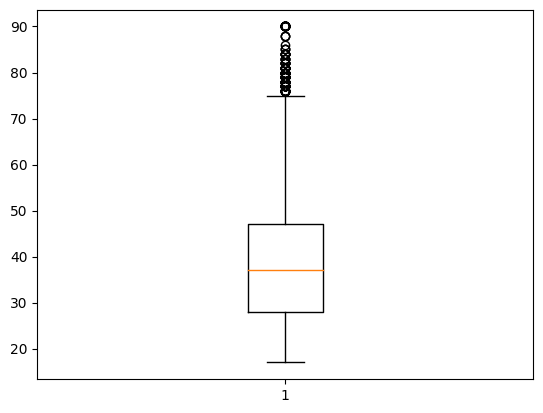

In [ ]:
plt.boxplot(df['age'])

In [ ]:
Q3 = df['age'].quantile(q=0.75)
Q1 = df['age'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['age'], lower_bound, upper_bound)
df['age'] = a

19.0


In [ ]:
Q3 = df['capitalgain'].quantile(q=0.75)
Q1 = df['capitalgain'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['capitalgain'], lower_bound, upper_bound)
df['capitalgain'] = b

0.0


In [ ]:
Q3 = df['capitalloss'].quantile(q=0.75)
Q1 = df['capitalloss'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['capitalloss'], lower_bound, upper_bound)
df['capitalloss'] = c

0.0


In [ ]:
Q3 = df['hoursperweek'].quantile(q=0.75)
Q1 = df['hoursperweek'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['hoursperweek'], lower_bound, upper_bound)
df['hoursperweek'] = d

5.0


{'whiskers': [<matplotlib.lines.Line2D at 0x780aa948cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x780aa948fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x780aa948d7e0>],
 'medians': [<matplotlib.lines.Line2D at 0x780aa948dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x780aa948d1e0>],
 'means': []}

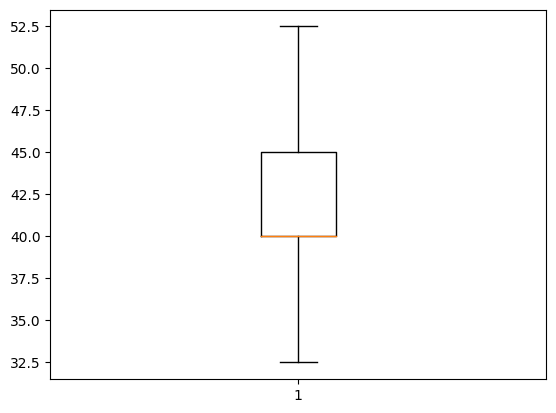

In [ ]:
plt.boxplot(df['hoursperweek'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoding and One-hot encoding
label = LabelEncoder()
df['workclass'] = label.fit_transform(df['workclass'])
df['education'] = label.fit_transform(df['education'])
df['maritalstatus'] = label.fit_transform(df['maritalstatus'])
df['occupation'] = label.fit_transform(df['occupation'])
df['relationship'] = label.fit_transform(df['relationship'])
df['race'] = label.fit_transform(df['race'])
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df['native'] = label.fit_transform(df['native'])
df['native'] = label.fit_transform(df['native'])
df = pd.get_dummies(df, columns=['Salary'], drop_first=True)

In [ ]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K
0,39.0,5,3,1,4,0,4,0,0,40.0,3,1,0
1,50.0,4,3,0,4,3,4,0,0,32.5,3,1,0
2,38.0,2,5,2,1,0,4,0,0,40.0,3,1,0
3,53.0,2,2,0,1,3,2,0,0,40.0,3,1,0
4,28.0,2,3,0,4,3,2,0,0,40.0,1,0,0


In [ ]:
#Feature Engineer
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df['age1'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

bins1 = [0, 20, 40, 60, 100]
labels1 = ['Part-Time', 'Full-Time', 'Over-Time', 'Extreme']


df['working_hours'] = pd.cut(df['hoursperweek'], bins=bins1, labels=labels1, right=False)

In [ ]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K,age1,working_hours
0,39.0,5,3,1,4,0,4,0,0,40.0,3,1,0,36-50,Over-Time
1,50.0,4,3,0,4,3,4,0,0,32.5,3,1,0,51-65,Full-Time
2,38.0,2,5,2,1,0,4,0,0,40.0,3,1,0,36-50,Over-Time
3,53.0,2,2,0,1,3,2,0,0,40.0,3,1,0,51-65,Over-Time
4,28.0,2,3,0,4,3,2,0,0,40.0,1,0,0,19-35,Over-Time


In [ ]:
df = df.drop('age', axis=1)

In [ ]:
df['age1'] = df['age1'].str.strip()
df['age1'] = df['age1'].replace({'0-18': 'Young Adults',
                                 '19-35':'Young Adults',
                                 '36-50' : 'Middle-Aged',
                                 '51-65' : 'Middle-Aged',
                                 '66-100' : 'Seniors'})

In [ ]:
df['age1'].unique()

array(['Middle-Aged', 'Young Adults', 'Seniors'], dtype=object)

In [ ]:
df['age1'] = label.fit_transform(df['age1'])
df['working_hours'] = label.fit_transform(df['working_hours'])

In [ ]:
df = df.drop('hoursperweek', axis=1)


In [ ]:
df.head()

,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,native,sex_ Male,Salary_ >50K,age1,working_hours
0,5,3,1,4,0,4,0,0,3,1,0,0,1
1,4,3,0,4,3,4,0,0,3,1,0,0,0
2,2,5,2,1,0,4,0,0,3,1,0,0,1
3,2,2,0,1,3,2,0,0,3,1,0,0,1
4,2,3,0,4,3,2,0,0,1,0,0,2,1


#**BIVARIATE ANALYSIS**

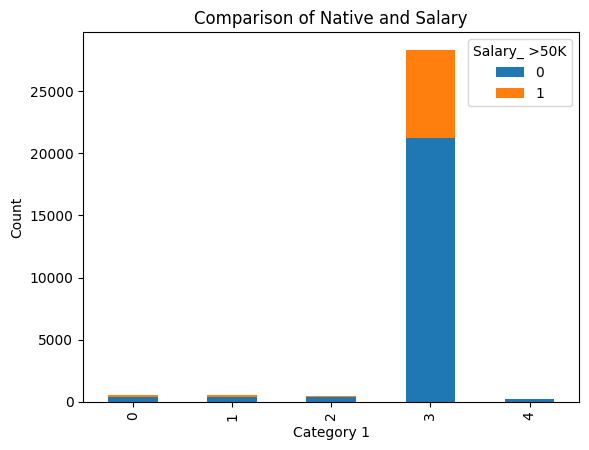

In [ ]:
cross_tab = pd.crosstab(df['native'], df['Salary_ >50K'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Native and Salary')
plt.show()

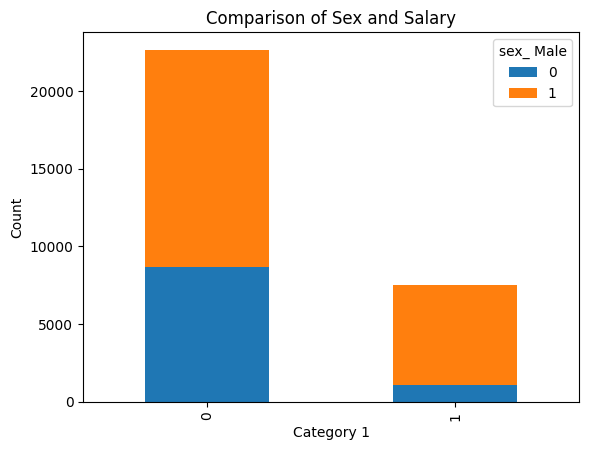

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['sex_ Male'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Sex and Salary')
plt.show()

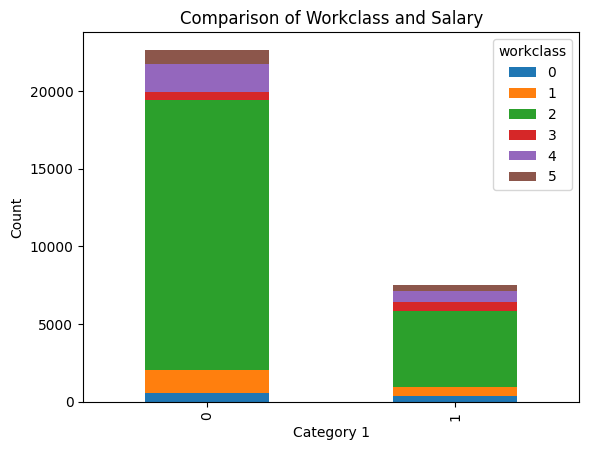

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['workclass'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Workclass and Salary')
plt.show()

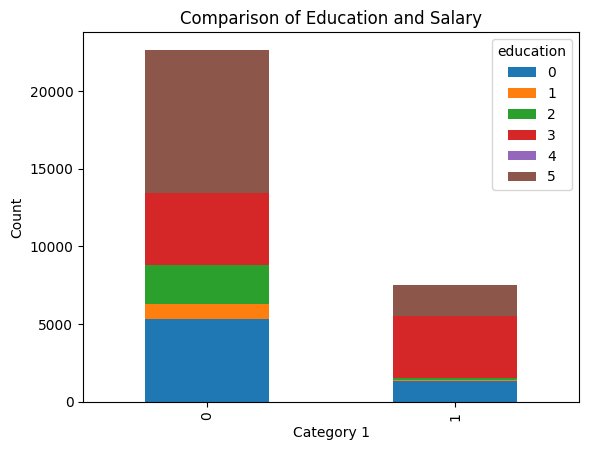

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['education'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Education and Salary')
plt.show()

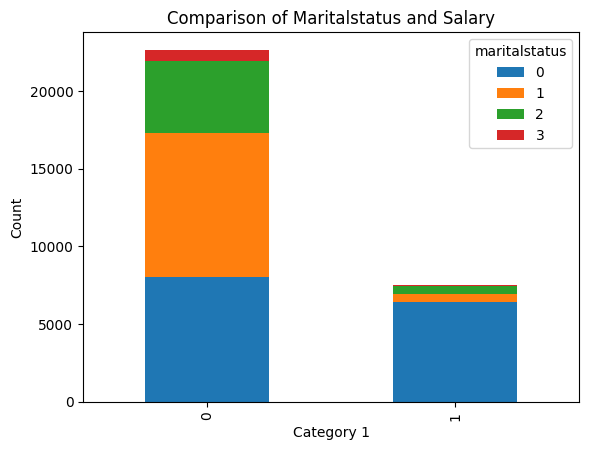

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['maritalstatus'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Maritalstatus and Salary')
plt.show()

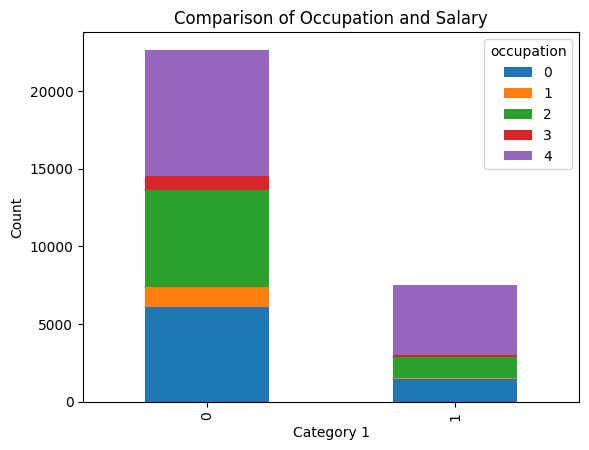

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['occupation'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Occupation and Salary')
plt.show()

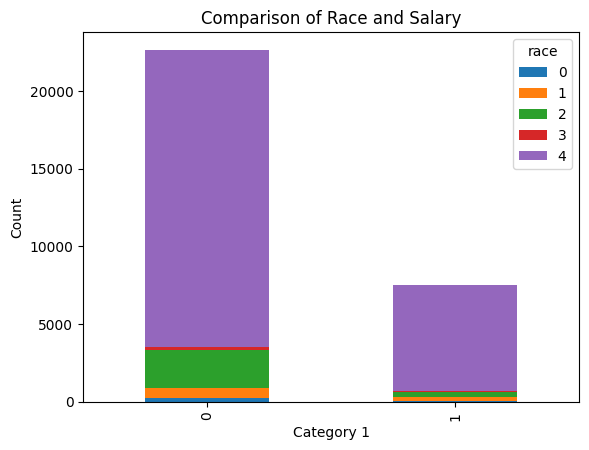

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['race'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Race and Salary')
plt.show()

In [ ]:
#Plot b/w numerical and categorical variable

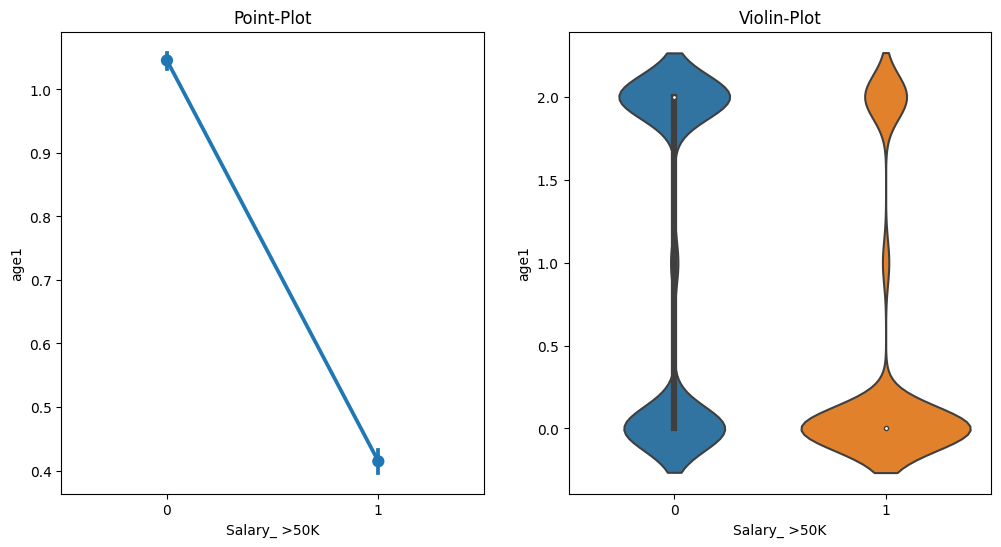

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df['Salary_ >50K'], y=df['age1'], data=df, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df['Salary_ >50K'], y=df['age1'], data=df, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.show()

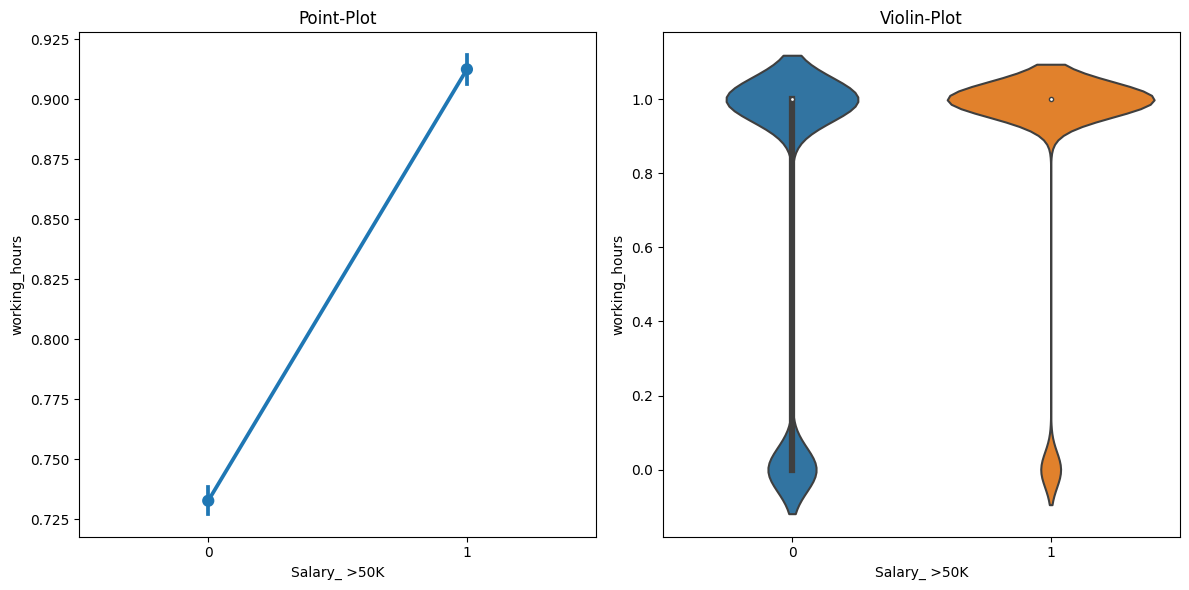

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df['Salary_ >50K'], y=df['working_hours'], data=df, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df['Salary_ >50K'], y=df['working_hours'], data=df, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.tight_layout()
plt.show()

#**TEST DATASET**

In [ ]:
df1 = pd.read_csv("/content/SalaryData_Test(1).csv")

In [ ]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
for i in df1.columns:
  if df1[i].dtype=='object':
     print(df1[i].value_counts())
     print(" ")

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-

In [ ]:
df1['workclass'] = df1['workclass'].str.strip()
df1['workclass'] = df1['workclass'].replace({'Without-pay': 'Self-emp-not-inc'})
df1['education'] = df1['education'].str.strip()
df1['education'] = df1['education'].replace({'1st-4th': 'Elementary school',
                                           '5th-6th' : 'Elementary school',
                                           '7th-8th' : 'Elementary school',
                                           '9th' : 'HS-grad',
                                           '12th' : 'HS-grad',
                                           '10th' : 'HS-grad',
                                           '11th' : 'HS-grad',
                                           'Some-college' : 'Bachelors',
                                           'Bachelors' : 'Higher Education',
                                           'Masters' : 'Higher Education',
                                           'Assoc-acdm' : 'Higher Education',
                                           'Doctorate' : 'Higher Education',
                                           'Prof-school' : 'Higher Education',
                                           'HS-grad' : 'Secondary Education',
                                           'Assoc-voc' : 'Secondary Education',
                                           'Elementary school' : 'Primary Education',
                                           'Preschool' : 'Primary Education'
                                           })
df1['maritalstatus'] = df1['maritalstatus'].str.strip()
df1['maritalstatus'] = df1['maritalstatus'].replace({'Married-civ-spouse': 'Married',
                                                   'Married-spouse-absent': 'Married',
                                                   'Married-AF-spouse' : 'Married',
                                                   'Divorced' : 'Seperated/Divorced',
                                                   'Separated' : 'Seperated/Divorced'
                                                   })
df1['occupation'] = df1['occupation'].str.strip()
df1['occupation'] = df1['occupation'].replace({'Prof-specialty': 'White-collar jobs',
                                             'Exec-managerial' : 'White-collar jobs',
                                             'Adm-clerical' : 'White-collar jobs',
                                             'Tech-support' : 'White-collar jobs',
                                             'Craft-repair' : 'Blue-Collar jobs',
                                             'Machine-op-inspct' : 'Blue-Collar jobs',
                                             'Transport-moving' : 'Blue-Collar jobs',
                                             'Handlers-cleaner' : 'Blue-Collar jobs',
                                             'Sales' : 'Sales/Services',
                                             'Other-service' : 'Sales/Services',
                                             'Protective-serv' : 'Sales/Services',
                                             'Priv-house-serv' : 'Sales/Services',
                                             'Farming-fishing' : 'Specialized Roles',
                                             'Armed-Forces' : 'Specialized Roles'
                                             })
df1['relationship'] = df1['relationship'].str.strip()
df1['relationship'] = df1['relationship'].replace({'Husband': 'Spouse',
                                                 'Wife' : 'Spouse'})
df1['native'] = df1['native'].str.strip()
df1['native'] = df1['native'].replace({'United-States': 'North-America',
                                     'Mexico' : 'North-America',
                                     'Canada' : 'North-America',
                                     'Puerto-Rico' : 'North-America',
                                     'Philippines' : 'Asia',
                                     'India' : 'Asia',
                                     'China' : 'Asia',
                                     'Japan' : 'Asia',
                                     'Vietnam' : 'Asia',
                                     'Cambodia' : 'Asia',
                                     'Laos' : 'Asia',
                                     'Thailand' : 'Asia',
                                     'Hong kong' : 'Asia',
                                     'Germany' : 'Europe',
                                     'Cuba' : 'Europe',
                                     'England' : 'Europe',
                                     'Italy' : 'Europe',
                                     'Poland' : 'Europe',
                                     'Ireland' : 'Europe',
                                     'Greece' : 'Europe',
                                     'France' : 'Europe',
                                     'Portugal' : 'Europe',
                                     'Scotland' : 'Europe',
                                     'El-Salvador' : 'Latin America',
                                     'Dominican-Republic' : 'Latin America',
                                     'Guatemala' : 'Latin America',
                                     'Jamaica' : 'Latin America',
                                     'Trinadad&Tobago' : 'Latin America',
                                     'Haiti' : 'Latin America',
                                     'Nicaragua' : 'Latin America',
                                     'Peru' : 'Latin America',
                                     'Ecuador' : 'Latin America',
                                     'South China' : 'Other',
                                     'Yugoslavia' : 'Other',
                                     'Outlying-US' : 'Other',
                                     'Hungary' : 'Other',
                                     'Honduras' : 'Other',
                                     'Iran' : 'Other',
                                     'Taiwan' : 'Other',
                                     'Outlying-US(Guam-USVI-etc)' : 'Other',
                                     'Columbia' : 'Other',
                                     'South' : 'Other',
                                     'Hong' : 'Asia'
                                     })

In [ ]:
for i in df1.columns:
  if df1[i].dtype=='object':
     print(df1[i].value_counts())
     print(" ")

Private             11021
Self-emp-not-inc     1304
Local-gov            1033
State-gov             667
Self-emp-inc          572
Federal-gov           463
Name: workclass, dtype: int64
 
Secondary Education    5595
Higher Education       4324
Bachelors              3221
HS-grad                1395
Elementary school       498
Primary Education        27
Name: education, dtype: int64
 
Married               7183
Never-married         4872
Seperated/Divorced    2555
Widowed                450
Name: maritalstatus, dtype: int64
 
White-collar jobs    6289
Sales/Services       3841
Blue-Collar jobs     3738
Handlers-cleaners     696
Specialized Roles     496
Name: occupation, dtype: int64
 
Spouse            6888
Not-in-family     3976
Own-child         2160
Unmarried         1576
Other-relative     460
Name: relationship, dtype: int64
 
 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race

In [ ]:
df1 = df1.drop('educationno', axis=1)

In [ ]:
Q3 = df1['age'].quantile(q=0.75)
Q1 = df1['age'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df1['age'], lower_bound, upper_bound)
df1['age'] = e

20.0


In [ ]:
Q3 = df1['capitalgain'].quantile(q=0.75)
Q1 = df1['capitalgain'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df1['capitalgain'], lower_bound, upper_bound)
df1['capitalgain'] = f


0.0


In [ ]:
Q3 = df1['capitalloss'].quantile(q=0.75)
Q1 = df1['capitalloss'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df1['capitalloss'], lower_bound, upper_bound)
df1['capitalloss'] = g

0.0


In [ ]:
Q3 = df1['hoursperweek'].quantile(q=0.75)
Q1 = df1['hoursperweek'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df1['hoursperweek'], lower_bound, upper_bound)
df1['hoursperweek'] = h

5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label encoding and one-hot encoding
label = LabelEncoder()
df1['workclass'] = label.fit_transform(df1['workclass'])
df1['education'] = label.fit_transform(df1['education'])
df1['maritalstatus'] = label.fit_transform(df1['maritalstatus'])
df1['occupation'] = label.fit_transform(df1['occupation'])
df1['relationship'] = label.fit_transform(df1['relationship'])
df1['race'] = label.fit_transform(df1['race'])
df1 = pd.get_dummies(df1, columns=['sex'], drop_first=True)
df1['native'] = label.fit_transform(df1['native'])
df1['native'] = label.fit_transform(df1['native'])
df1 = pd.get_dummies(df1, columns=['Salary'], drop_first=True)

In [ ]:
df1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K
0,25,2,2,1,0,2,2,0,0,40.0,3,1,0
1,38,2,5,0,3,3,4,0,0,50.0,3,1,0
2,28,1,3,0,2,3,4,0,0,40.0,3,1,1
3,44,2,0,0,0,3,2,0,0,40.0,3,1,1
4,34,2,2,1,2,0,4,0,0,32.5,3,1,0


In [ ]:
#Feature Engineer
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df1['age1'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

In [ ]:
df1 = df1.drop('age', axis=1)

In [ ]:
df1['age1'] = df1['age1'].str.strip()
df1['age1'] = df1['age1'].replace({'0-18': 'Young Adults',
                                 '19-35':'Young Adults',
                                 '36-50' : 'Middle-Aged',
                                 '51-65' : 'Middle-Aged',
                                 '66-100' : 'Seniors'})


In [ ]:
df1['age1'] = label.fit_transform(df1['age1'])

In [ ]:
bins1 = [0, 20, 40, 60, 100]  # Define your bin edges
labels1 = ['Part-Time', 'Full-Time', 'Over-Time', 'Extreme']  # Define labels for each bin

# Create a new column 'working_hours_category' based on the bins
df1['working_hours'] = pd.cut(df1['hoursperweek'], bins=bins1, labels=labels1, right=False)

In [ ]:
df1['working_hours'] = label.fit_transform(df1['working_hours'])

In [ ]:
df1 = df1.drop('hoursperweek', axis=1)

In [ ]:
df1.head()

,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,native,sex_ Male,Salary_ >50K,age1,working_hours
0,2,2,1,0,2,2,0,0,3,1,0,2,1
1,2,5,0,3,3,4,0,0,3,1,0,0,1
2,1,3,0,2,3,4,0,0,3,1,1,2,1
3,2,0,0,0,3,2,0,0,3,1,1,0,1
4,2,2,1,2,0,4,0,0,3,1,0,2,0


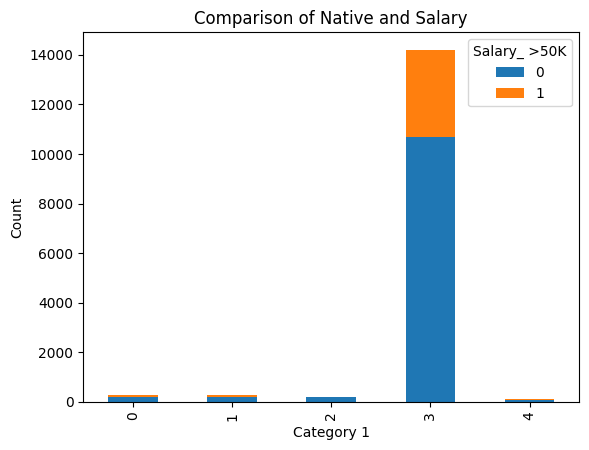

In [ ]:
cross_tab = pd.crosstab(df1['native'], df1['Salary_ >50K'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Native and Salary')
plt.show()

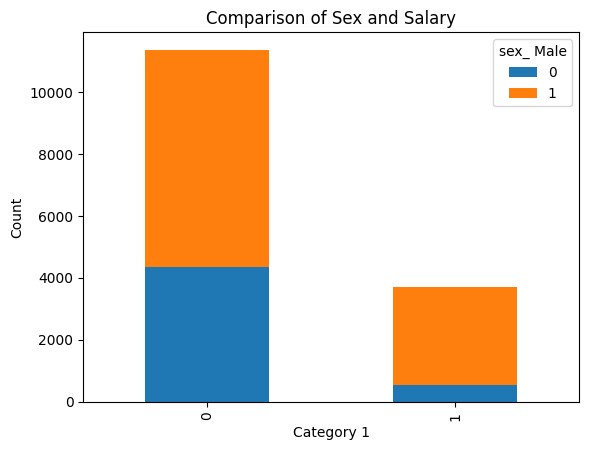

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['sex_ Male'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Sex and Salary')
plt.show()

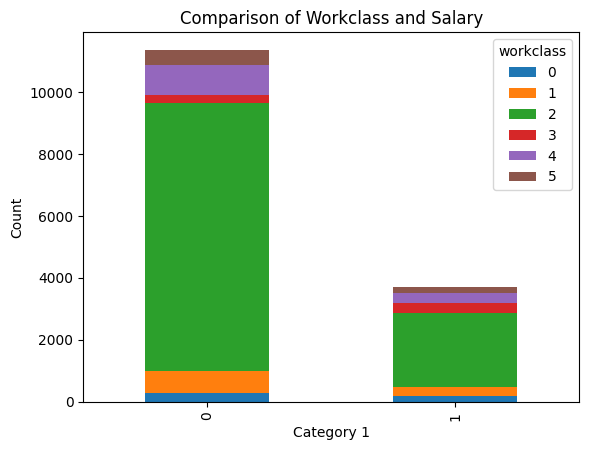

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['workclass'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Workclass and Salary')
plt.show()

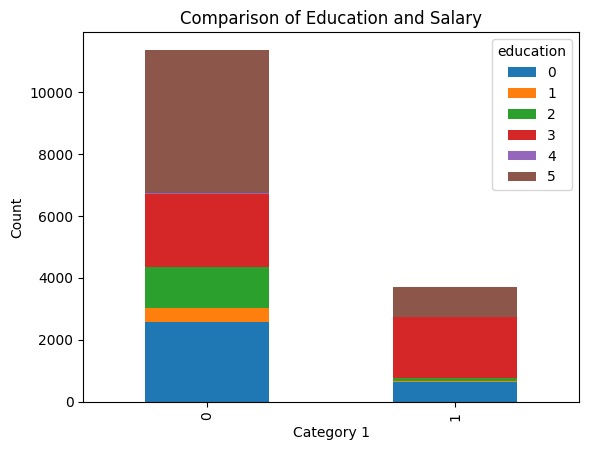

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['education'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Education and Salary')
plt.show()

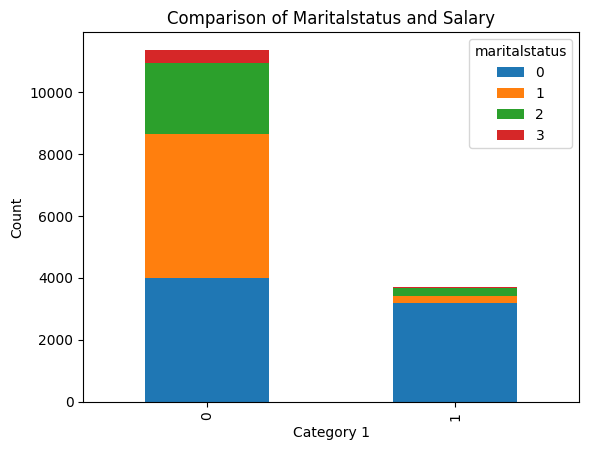

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['maritalstatus'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Maritalstatus and Salary')
plt.show()

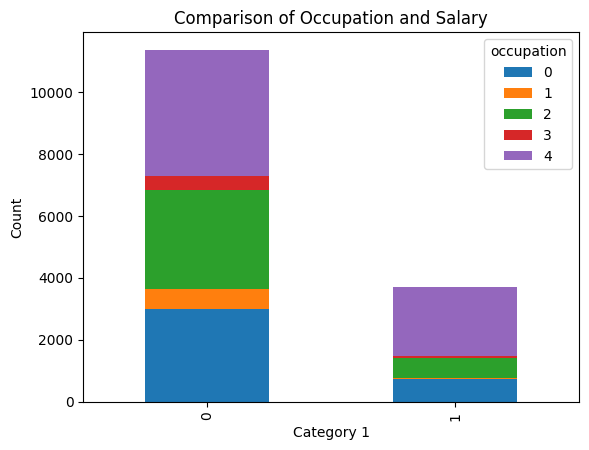

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['occupation'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Occupation and Salary')
plt.show()

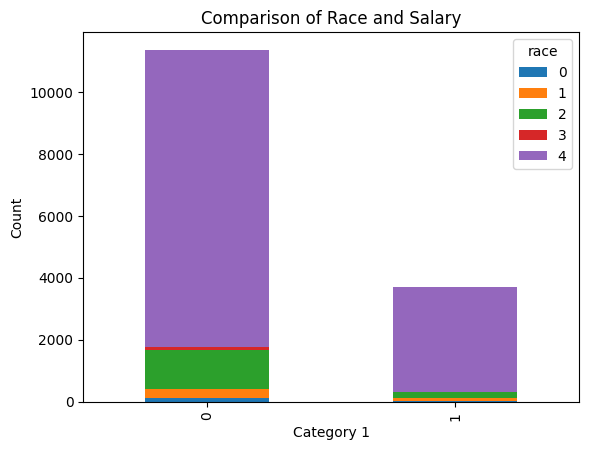

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['race'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Race and Salary')
plt.show()

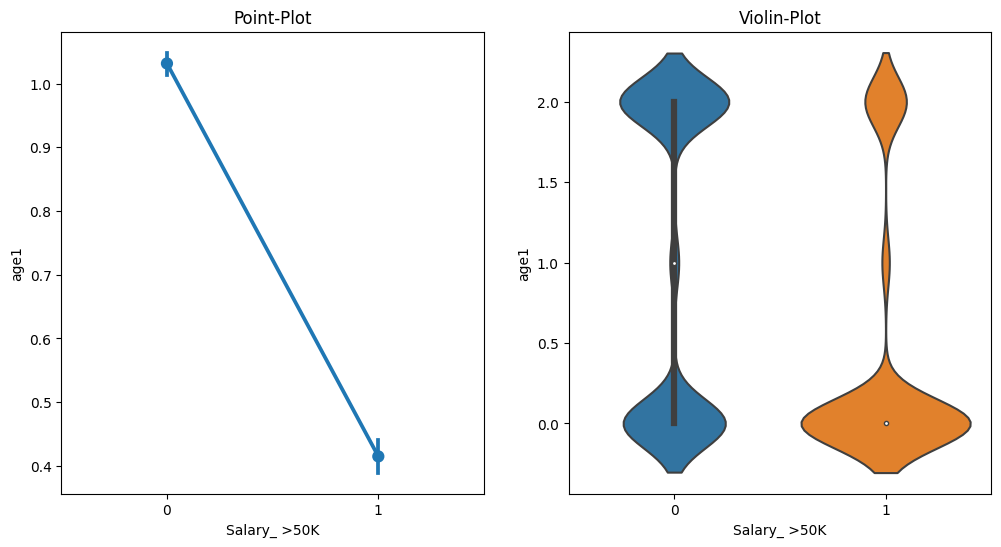

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df1['Salary_ >50K'], y=df1['age1'], data=df1, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df1['Salary_ >50K'], y=df1['age1'], data=df1, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.show()

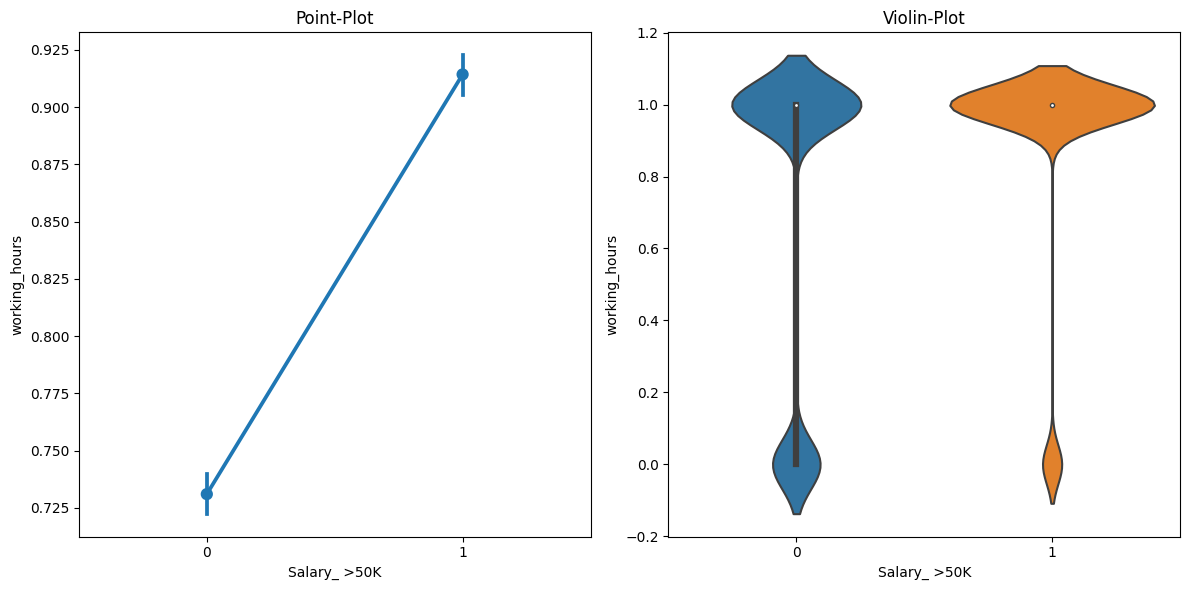

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df1['Salary_ >50K'], y=df1['working_hours'], data=df1, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df1['Salary_ >50K'], y=df1['working_hours'], data=df1, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,native,sex_ Male,Salary_ >50K,age1,working_hours
0,5,3,1,4,0,4,0,0,3,1,0,0,1
1,4,3,0,4,3,4,0,0,3,1,0,0,0
2,2,5,2,1,0,4,0,0,3,1,0,0,1
3,2,2,0,1,3,2,0,0,3,1,0,0,1
4,2,3,0,4,3,2,0,0,1,0,0,2,1


#**MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train = df.drop(['Salary_ >50K'], axis=1)
Y_train = df['Salary_ >50K']

X_test = df1.drop('Salary_ >50K', axis=1)
Y_test = df1['Salary_ >50K']

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
class_weight = {0:2.0, 1:2.5}

In [ ]:
svm = SVC(kernel='rbf', class_weight=class_weight, gamma=0.5, C=1.0)
svm.fit(X_train,Y_train)

SVC(class_weight={0: 2.0, 1: 2.5}, gamma=0.5)

In [ ]:
svm.score(X_train,Y_train)

0.8428102516494811

In [ ]:
svm.score(X_test,Y_test)

0.8167330677290837

In [ ]:
df['Salary_ >50K'].value_counts()

0    22653
1     7508
Name: Salary_ >50K, dtype: int64

In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.8167330677290837


In [ ]:
print("Classification Report:\n", classification_report(Y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     11360
           1       0.63      0.60      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.74      0.75     15060
weighted avg       0.81      0.82      0.82     15060

Confusion Matrix:
 [[10069  1291]
 [ 1469  2231]]


#**NEXT DATASET**

In [ ]:
df2 = pd.read_csv("/content/forestfires.csv")

#**EDA**

In [ ]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df2.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
df2 = df2.drop(['dayfri','daysat','daymon','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
df2.sort_values(by='area', ascending=False).head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,large
415,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,large
479,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,large
237,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,large
236,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,large


In [ ]:
freq_encoding = df2['month'].value_counts(normalize=True)
df2['month_encoded'] = df2['month'].map(freq_encoding)
freq_encoding = df2['day'].value_counts(normalize=True)
df2['day_encoded'] = df2['day'].map(freq_encoding)

In [ ]:
df2 = df2.drop(['month','day'],axis=1)

In [ ]:
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,month_encoded,day_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,0.104449,0.164410
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,0.029014,0.123791
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,0.029014,0.162476
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,0.104449,0.164410
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,0.104449,0.183752


In [ ]:
df2 = pd.get_dummies(df2, columns=['size_category'], drop_first=True)

#**UNIVARIATE ANALYSIS**

FFMC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa2b87940>, <matplotlib.lines.Line2D object at 0x780aa2b85330>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa2b87d30>, <matplotlib.lines.Line2D object at 0x780aa2b85810>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa2b862c0>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa2b87c40>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa2b843a0>], 'means': []}


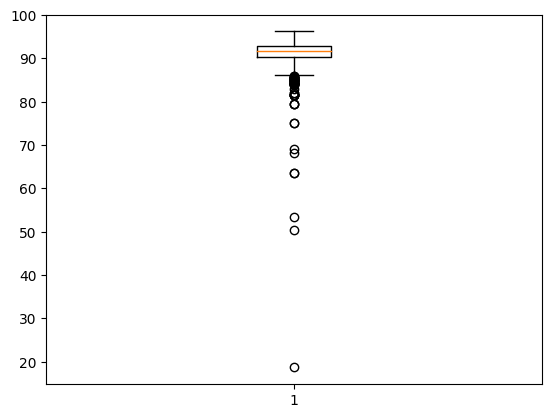

DMC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa56756c0>, <matplotlib.lines.Line2D object at 0x780aa5677f40>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa54c6500>, <matplotlib.lines.Line2D object at 0x780aa54c50c0>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa2c54970>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa7f7c880>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa7f7ebc0>], 'means': []}


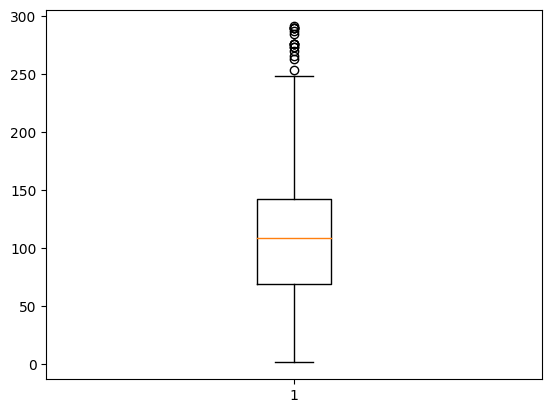

DC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa5693340>, <matplotlib.lines.Line2D object at 0x780aa5692c50>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa56901f0>, <matplotlib.lines.Line2D object at 0x780aa5691f30>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa5690910>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa56926e0>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa5692080>], 'means': []}


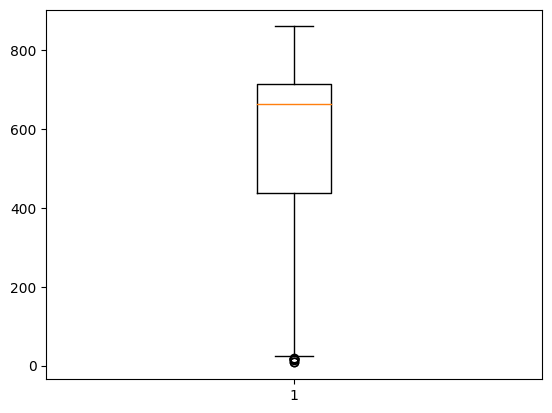

ISI :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa2c57ca0>, <matplotlib.lines.Line2D object at 0x780aa5afb070>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa5af8730>, <matplotlib.lines.Line2D object at 0x780aa5af8c40>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa2c55120>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa5af8640>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa5afaef0>], 'means': []}


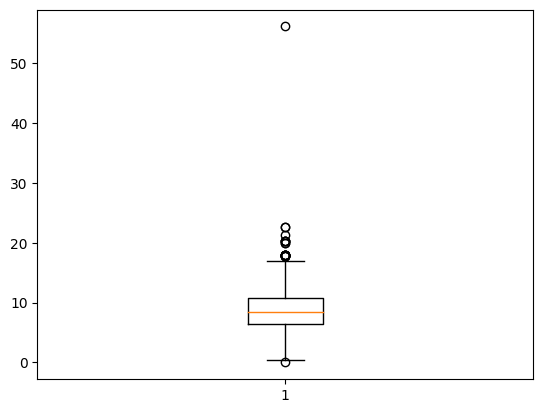

temp :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa08d5870>, <matplotlib.lines.Line2D object at 0x780aa08d5b10>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa08d5db0>, <matplotlib.lines.Line2D object at 0x780aa08d6050>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa08d55d0>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa08d62f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa08d6590>], 'means': []}


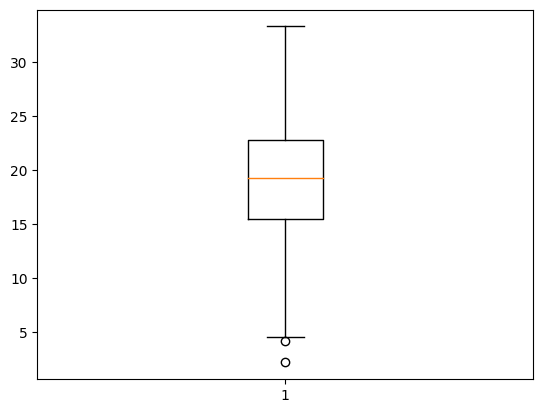

RH :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa08d5030>, <matplotlib.lines.Line2D object at 0x780aa08d44c0>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa08d4b50>, <matplotlib.lines.Line2D object at 0x780aa08d6c80>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa08d4850>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa08d7490>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa08d7010>], 'means': []}


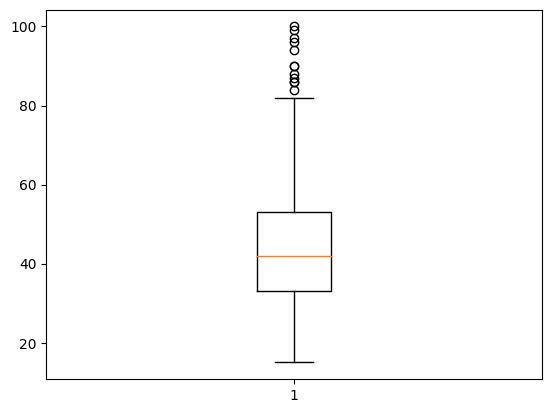

wind :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa2c55060>, <matplotlib.lines.Line2D object at 0x780aa2c56b60>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa2c57d00>, <matplotlib.lines.Line2D object at 0x780aa2c550f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa562d7b0>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa2c540d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa2c56500>], 'means': []}


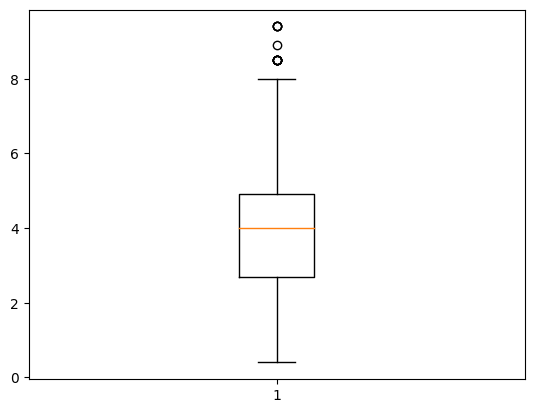

rain :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa08fcd90>, <matplotlib.lines.Line2D object at 0x780aa5af8b20>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa5afa7a0>, <matplotlib.lines.Line2D object at 0x780aa2ca2620>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa2c230a0>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa2ca1a50>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa2ca1210>], 'means': []}


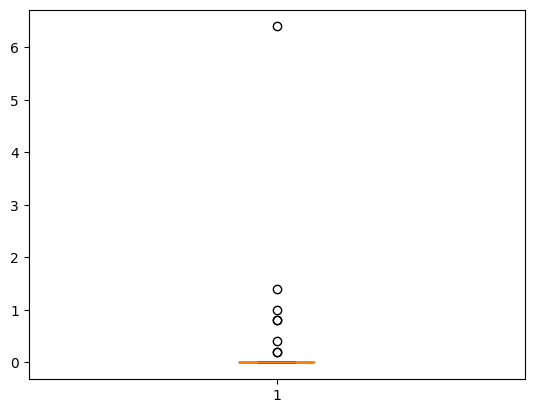

area :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa0860c10>, <matplotlib.lines.Line2D object at 0x780aa0860eb0>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa0861150>, <matplotlib.lines.Line2D object at 0x780aa08613f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa0860970>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa0861690>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa0861930>], 'means': []}


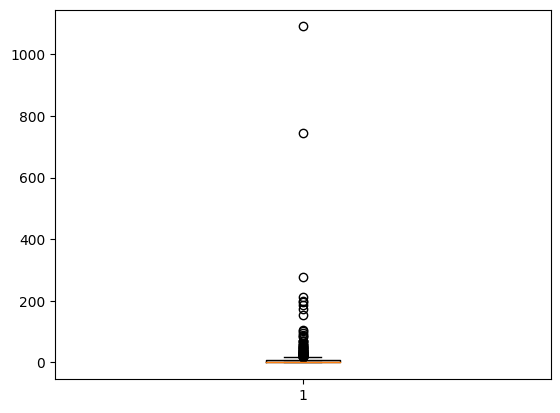

month_encoded :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa09fe9b0>, <matplotlib.lines.Line2D object at 0x780aa09fec50>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa09feef0>, <matplotlib.lines.Line2D object at 0x780aa09ff190>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa09fe830>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa09ff430>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa09ff6d0>], 'means': []}


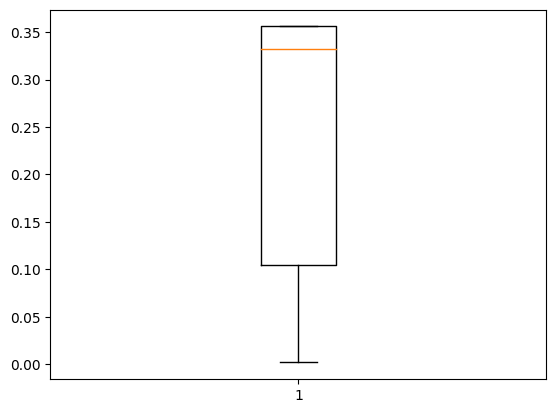

day_encoded :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa2c554b0>, <matplotlib.lines.Line2D object at 0x780aa2c57e20>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa2ca2ce0>, <matplotlib.lines.Line2D object at 0x780aa2ca39d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa562d3c0>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa2ca0c70>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa09c80d0>], 'means': []}


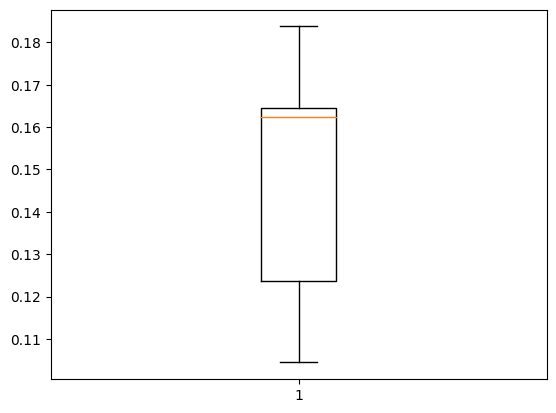

size_category_small :
{'whiskers': [<matplotlib.lines.Line2D object at 0x780aa096de70>, <matplotlib.lines.Line2D object at 0x780aa096dbd0>], 'caps': [<matplotlib.lines.Line2D object at 0x780aa096d930>, <matplotlib.lines.Line2D object at 0x780aa096d690>], 'boxes': [<matplotlib.lines.Line2D object at 0x780aa096e110>], 'medians': [<matplotlib.lines.Line2D object at 0x780aa096d3f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x780aa096d150>], 'means': []}


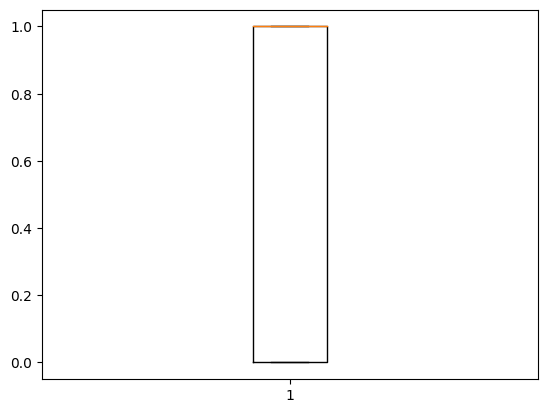

In [ ]:
for i in df2.columns:
  print(i,":")
  print(plt.boxplot(df2[i]))
  plt.show()

In [ ]:
Q3 = df2['FFMC'].quantile(q=0.75)
Q1 = df2['FFMC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df2['FFMC'], down, up)
df2['FFMC'] = a

In [ ]:
Q3 = df2['DMC'].quantile(q=0.75)
Q1 = df2['DMC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df2['DMC'], down, up)
df2['DMC'] = b

In [ ]:
Q3 = df2['DC'].quantile(q=0.75)
Q1 = df2['DC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df2['DC'], down, up)
df2['DC'] = c

In [ ]:
Q3 = df2['ISI'].quantile(q=0.75)
Q1 = df2['ISI'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df2['ISI'], down, up)
df2['ISI'] = d

In [ ]:
Q3 = df2['temp'].quantile(q=0.75)
Q1 = df2['temp'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df2['temp'], down, up)
df2['temp'] = e

In [ ]:
Q3 = df2['RH'].quantile(q=0.75)
Q1 = df2['RH'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df2['RH'], down, up)
df2['RH'] = f

In [ ]:
Q3 = df2['wind'].quantile(q=0.75)
Q1 = df2['wind'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df2['wind'], down, up)
df2['wind'] = g

In [ ]:
Q3 = df2['rain'].quantile(q=0.75)
Q1 = df2['rain'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df2['rain'], down, up)
df2['rain'] = h

In [ ]:
Q3 = df2['area'].quantile(q=0.75)
Q1 = df2['area'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

i = cap_extreme_values(df2['area'], down, up)
df2['area'] = i

In [ ]:
df2.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
FFMC,1.000000,0.534013,0.467209,0.795081,0.631504,-0.283575,-0.084672,NaN,-0.000823,0.498270,-0.122731,-0.001282
DMC,0.534013,1.000000,0.689109,0.374797,0.490311,0.072017,-0.108018,NaN,0.042561,0.648700,-0.031018,-0.030713
DC,0.467209,0.689109,1.000000,0.289050,0.496286,-0.027162,-0.197459,NaN,0.047103,0.780809,-0.045517,-0.019385
ISI,0.795081,0.374797,0.289050,1.000000,0.444847,-0.155914,0.112156,NaN,-0.006113,0.368885,-0.094842,-0.000965
temp,0.631504,0.490311,0.496286,0.444847,1.000000,-0.524971,-0.223913,NaN,0.013846,0.459573,-0.068154,-0.007259
RH,-0.283575,0.072017,-0.027162,-0.155914,-0.524971,1.000000,0.079884,NaN,-0.042681,-0.007873,0.172619,0.044273
wind,-0.084672,-0.108018,-0.197459,0.112156,-0.223913,0.079884,1.000000,NaN,0.077011,-0.127305,0.048490,-0.058280
rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,-0.000823,0.042561,0.047103,-0.006113,0.013846,-0.042681,0.077011,NaN,1.000000,0.010441,0.016998,-0.910085
month_encoded,0.498270,0.648700,0.780809,0.368885,0.459573,-0.007873,-0.127305,NaN,0.010441,1.000000,-0.044310,0.029376


#**BIVARIATE ANALYSIS**

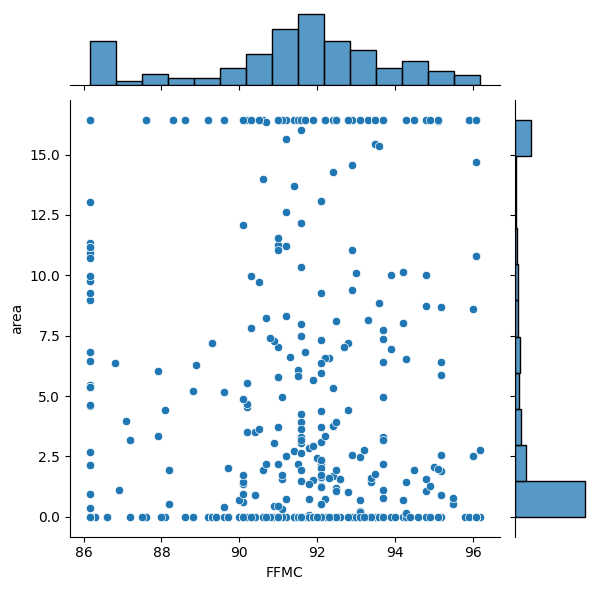

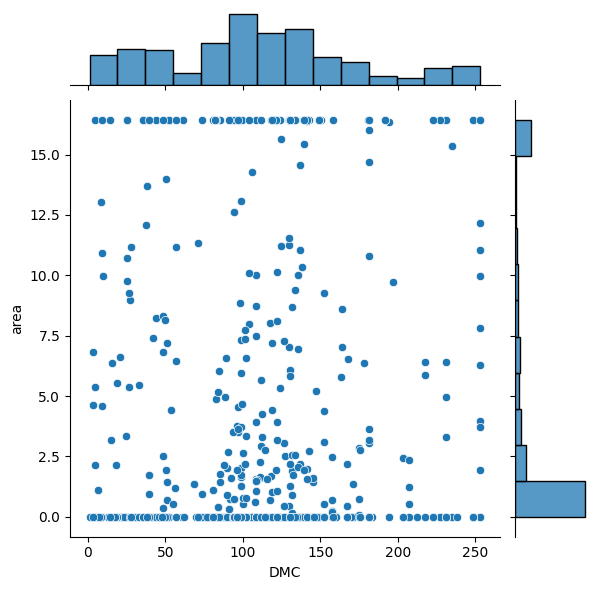

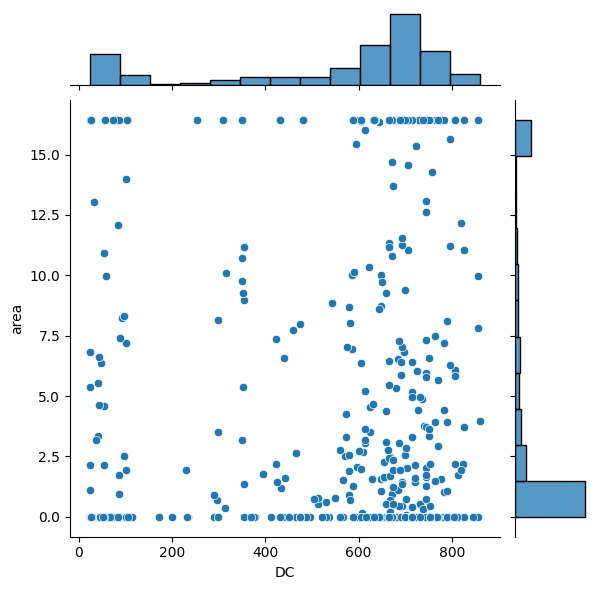

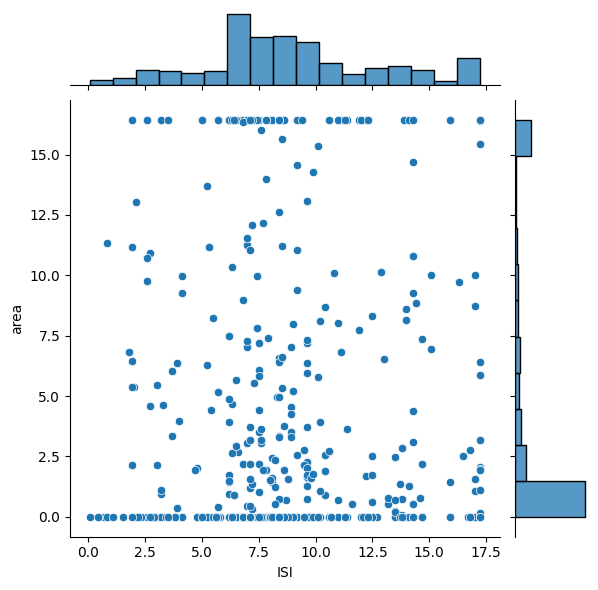

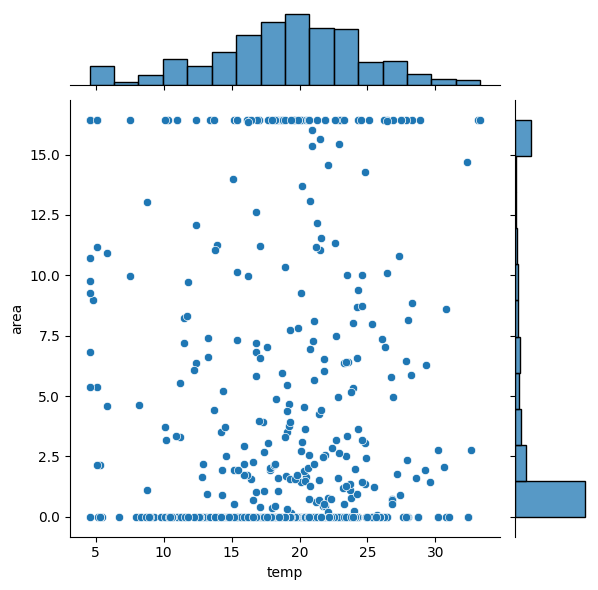

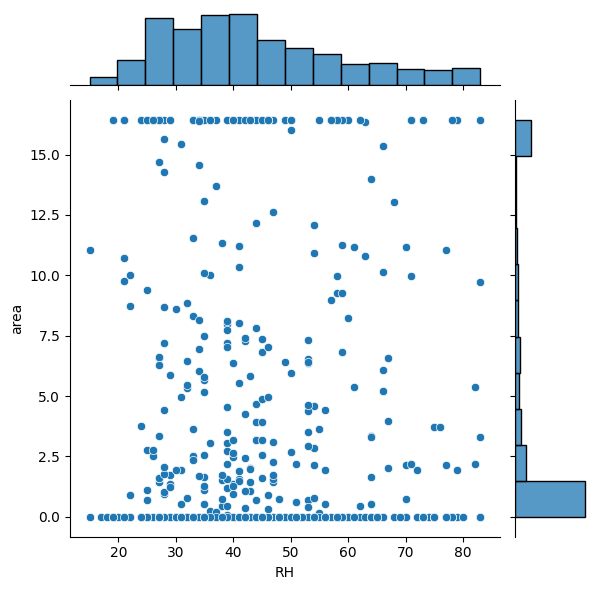

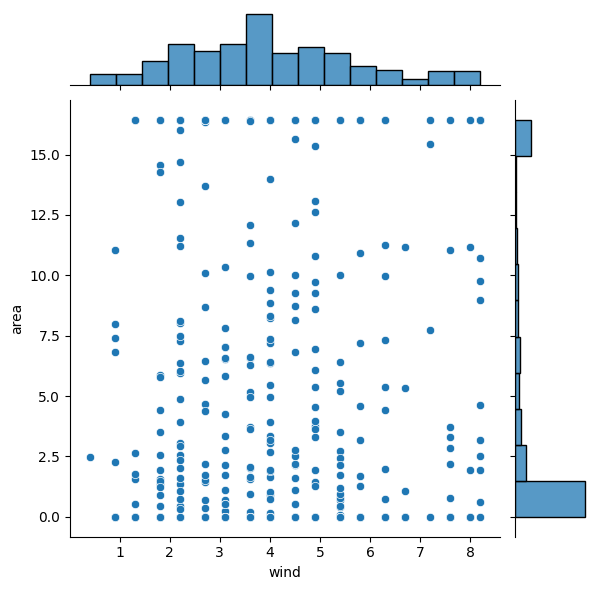

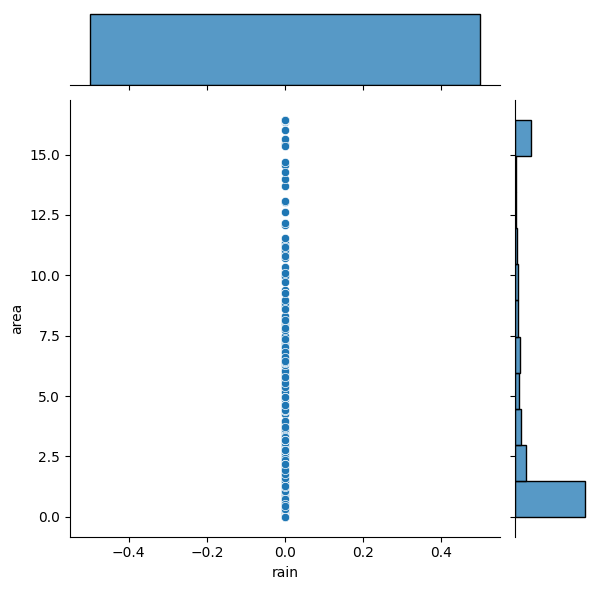

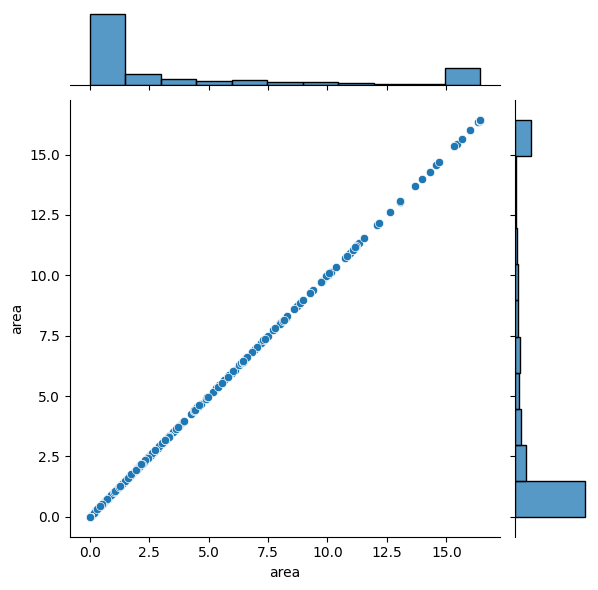

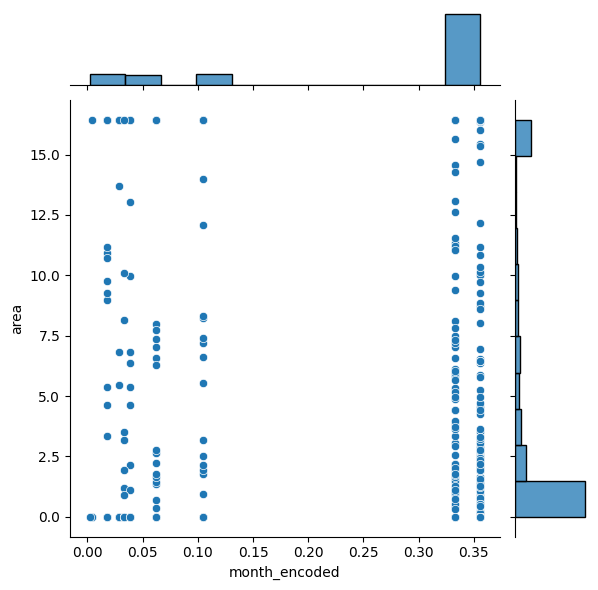

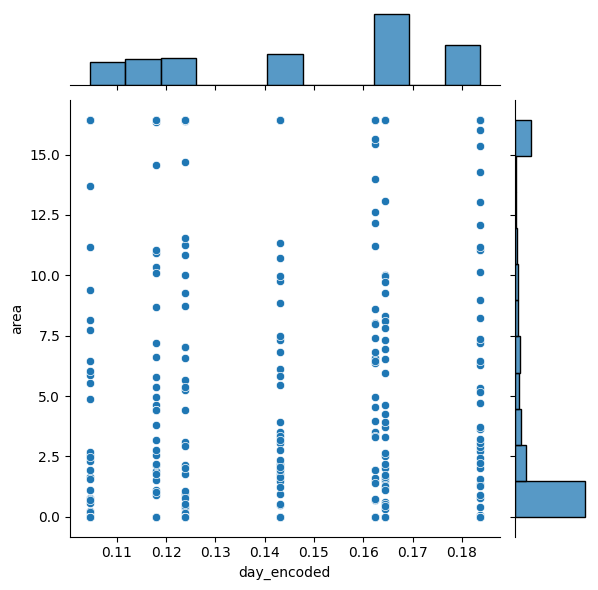

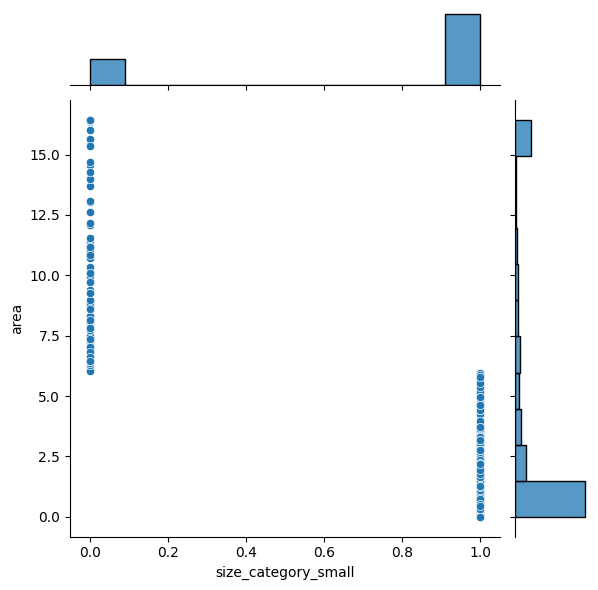

In [ ]:
for i in df2.columns:
  sns.jointplot(x=i, y='area', data=df2, kind='scatter')
  plt.show()

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'month_encoded'}>,
        <Axes: title={'center': 'day_encoded'}>,
        <Axes: title={'center': 'size_category_small'}>]], dtype=object)

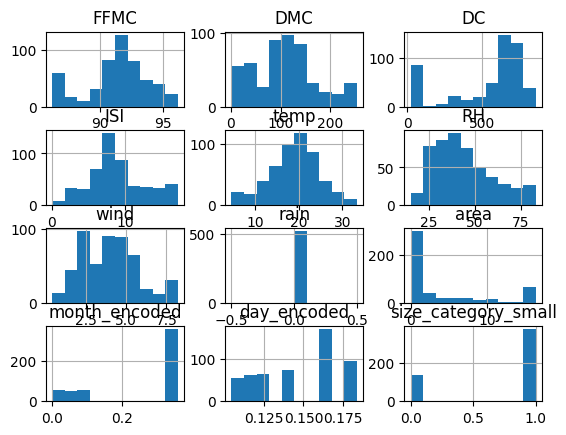

In [ ]:
df2.hist()

#**MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df2.drop('size_category_small', axis=1)
Y = df2['size_category_small']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = SVC(kernel='linear', C=1.0)

In [ ]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
model.score(X_train,Y_train)

0.9916897506925207

In [ ]:
model.score(X_test,Y_test)

0.9871794871794872

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(Y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.98      1.00      0.99       116

    accuracy                           0.99       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.99      0.99      0.99       156

Confusion Matrix:
 [[ 38   2]
 [  0 116]]
